In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory file
traj = md.load('Inputs/Week5.trr', top='Inputs/Week5.gro')

# Compute phi and psi dihedral angles
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)


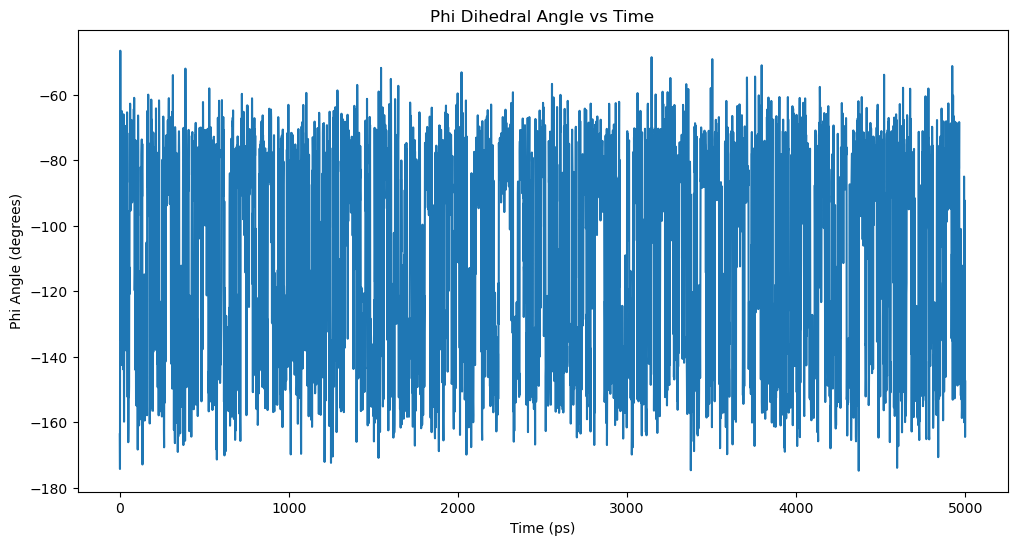

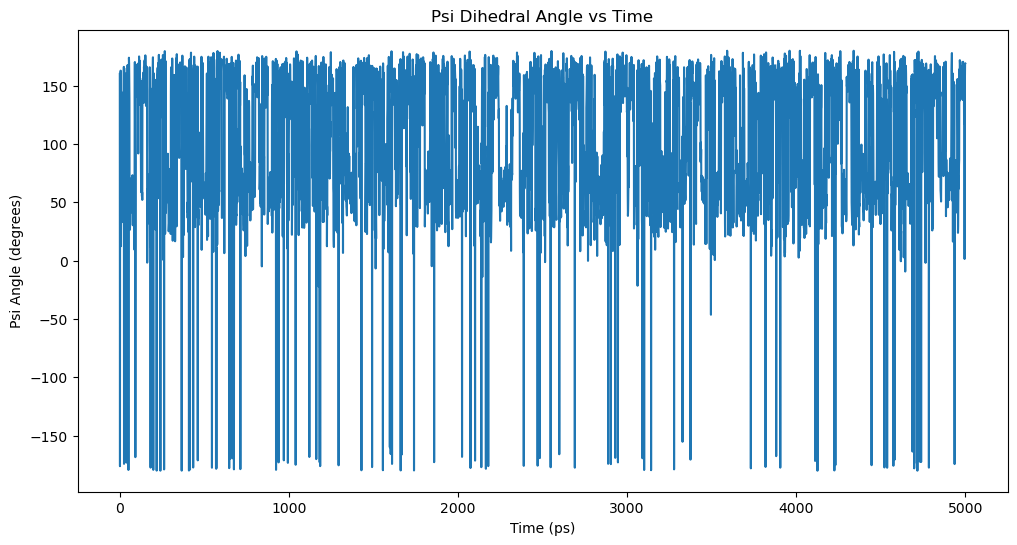

In [3]:
# Convert angles from radians to degrees
phi_angles_deg = np.rad2deg(phi_angles)
psi_angles_deg = np.rad2deg(psi_angles)

# Plot phi vs time
plt.figure(figsize=(12, 6))
plt.plot(traj.time, phi_angles_deg)
plt.title('Phi Dihedral Angle vs Time')
plt.xlabel('Time (ps)')
plt.ylabel('Phi Angle (degrees)')
plt.show()

# Plot psi vs time
plt.figure(figsize=(12, 6))
plt.plot(traj.time, psi_angles_deg)
plt.title('Psi Dihedral Angle vs Time')
plt.xlabel('Time (ps)')
plt.ylabel('Psi Angle (degrees)')
plt.show()

/state/partition1/job-38857135/ipykernel_1617221/2968951157.py:24: RuntimeWarning: divide by zero encountered in log
  FES = -np.log(np.outer(hist_phi, hist_psi))


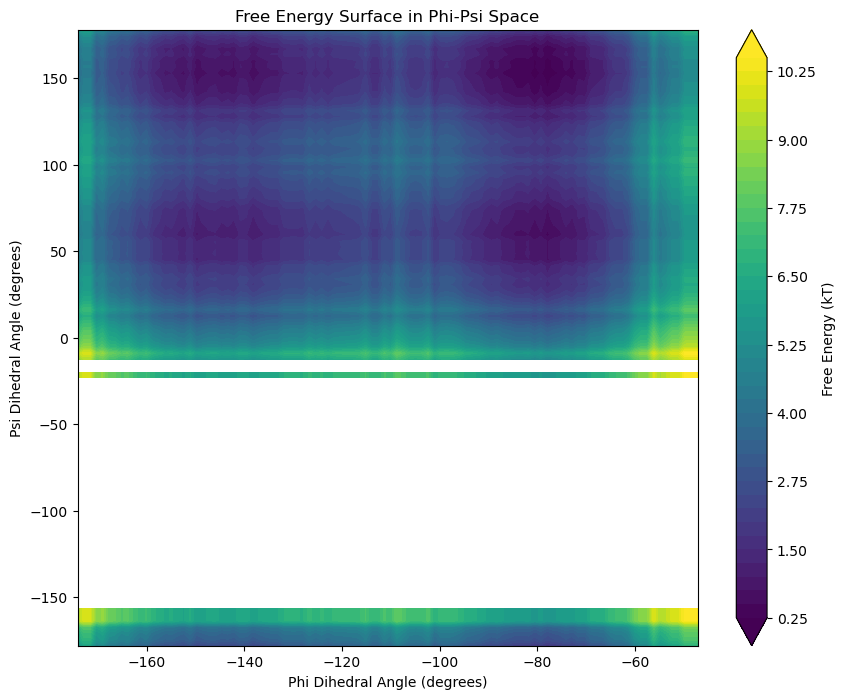

In [18]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

# Load the trajectory file
traj = md.load('Inputs/Week5.trr', top='Inputs/Week5.gro')

# Compute phi and psi dihedral angles
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

# Convert angles from radians to degrees
phi_angles_deg = np.rad2deg(phi_angles)
psi_angles_deg = np.rad2deg(psi_angles)

# Define the number of bins for phi and psi
num_bins = 100

# Compute histograms for phi and psi separately
hist_phi, phi_bins = np.histogram(phi_angles_deg, bins=num_bins)
hist_psi, psi_bins = np.histogram(psi_angles_deg, bins=num_bins)

# Calculate the free energy surface
FES = -np.log(np.outer(hist_phi, hist_psi))

# Set a floor value for the entire free energy surface
floor_value = 1e-10
FES[FES == -np.inf] = np.log(floor_value)

# Normalize the FES
FES -= np.min(FES)

# Define the bin centers
phi_centers = 0.5 * (phi_bins[1:] + phi_bins[:-1])
psi_centers = 0.5 * (psi_bins[1:] + psi_bins[:-1])

# Plot the free energy surface
plt.figure(figsize=(10, 8))
plt.contourf(phi_centers, psi_centers, FES.T, cmap='viridis', levels=50, extend='both')
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('Phi Dihedral Angle (degrees)')
plt.ylabel('Psi Dihedral Angle (degrees)')
plt.title('Free Energy Surface in Phi-Psi Space')
plt.show()
